# Dataset 1 Traffic Congestion Prediction

In [223]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import log
from sklearn import linear_model
import seaborn as sns

%matplotlib inline
traffic = pd.read_csv('Traffic (1).csv') 
traffic.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [224]:
#Checking for number of colums
traffic.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [225]:
# Check  for the missing value
traffic.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [226]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [227]:
#check duplicate
traffic.nunique()

Time                  96
Date                  31
Day of the week        7
CarCount             172
BikeCount             71
BusCount              51
TruckCount            41
Total                239
Traffic Situation      4
dtype: int64

In [228]:
traffic.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [229]:
traffic.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [230]:
traffic = traffic.drop(['Time',],axis =1)
traffic.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,10,Tuesday,31,0,4,4,39,low
1,10,Tuesday,49,0,3,3,55,low
2,10,Tuesday,46,0,3,6,55,low
3,10,Tuesday,51,0,2,5,58,low
4,10,Tuesday,57,6,15,16,94,normal


In [231]:
traffic.duplicated().sum()

5

In [232]:
traffic.BikeCount.value_counts()

BikeCount
5     211
4     165
1     156
0     145
2     137
     ... 
58      2
66      1
41      1
42      1
57      1
Name: count, Length: 71, dtype: int64

In [233]:
BikeCount = traffic.BikeCount.value_counts() #Store the values # in specialization
lessthan10 = BikeCount[BikeCount<=10]
lessthan10
def correctBikeCount(val):
    if val in lessthan10:
        return 'Others'
    else:
        return val
traffic['BikeCount'] = traffic['BikeCount'].apply(correctBikeCount)
traffic['BikeCount'].value_counts()

BikeCount
5         211
4         165
1         156
0         145
2         137
3         121
10        119
Others    106
6          84
9          84
22         82
20         82
24         81
15         79
7          79
12         79
17         74
23         73
14         73
25         72
8          72
18         72
13         70
21         67
16         66
19         61
11         60
27         50
26         48
28         46
29         42
30         31
35         28
40         26
32         23
31         23
37         21
39         18
38         17
36         17
34         16
Name: count, dtype: int64

In [234]:
traffic.describe()

,Date,CarCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,15.279570,15.324933,114.218414
std,8.945775,45.850693,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,50.000000,40.000000,279.000000


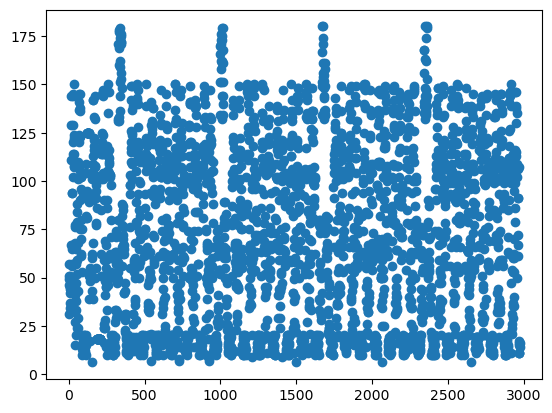

In [235]:
plt.scatter(traffic.index,traffic['CarCount'])

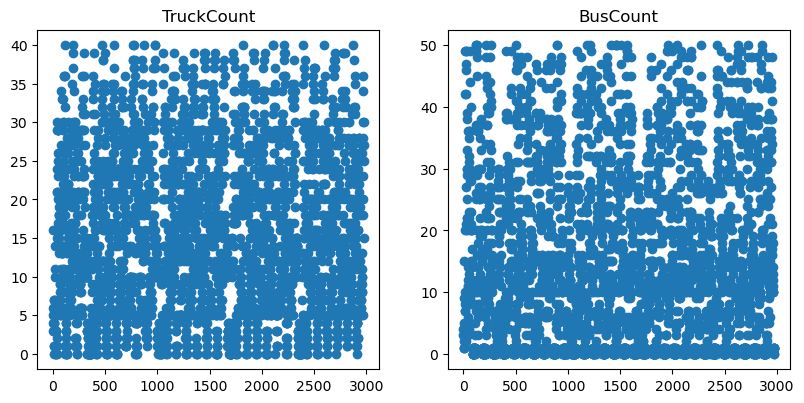

In [236]:
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
plt.scatter(traffic.index, traffic.TruckCount)
plt.title('TruckCount')
plt.subplot(3,3,2)
plt.scatter(traffic.index, traffic.BusCount)
plt.title('BusCount')

plt.show()

<Axes: xlabel='CarCount', ylabel='Total'>

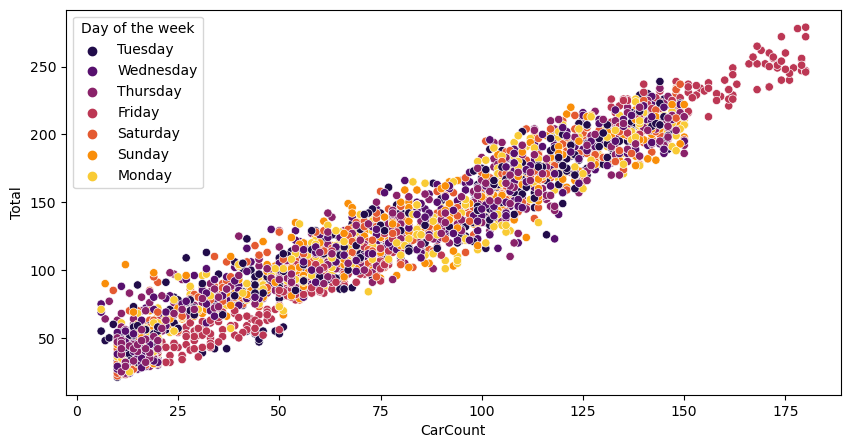

In [237]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=traffic, x='CarCount', y='Total', hue='Day of the week', palette='inferno')


<Axes: xlabel='BusCount', ylabel='Total'>

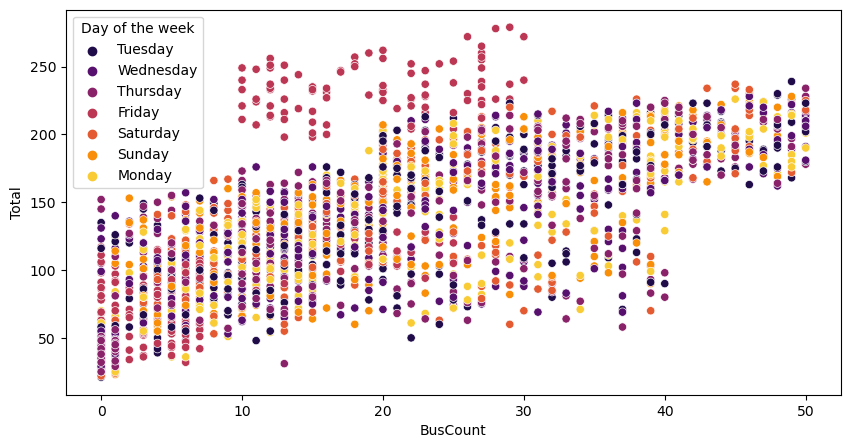

In [238]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=traffic, x='BusCount', y='Total', hue='Day of the week', palette='inferno')


<Axes: xlabel='TruckCount', ylabel='Total'>

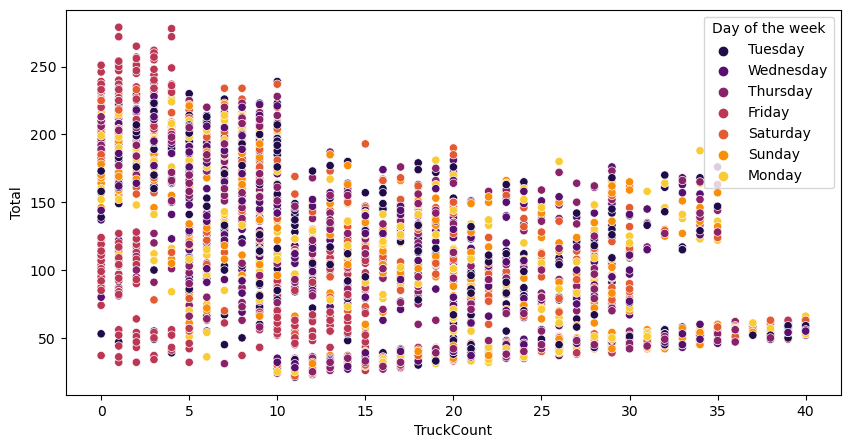

In [239]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=traffic, x='TruckCount', y='Total', hue='Day of the week', palette='inferno')


In [240]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               2976 non-null   int64 
 1   Day of the week    2976 non-null   object
 2   CarCount           2976 non-null   int64 
 3   BikeCount          2976 non-null   object
 4   BusCount           2976 non-null   int64 
 5   TruckCount         2976 non-null   int64 
 6   Total              2976 non-null   int64 
 7   Traffic Situation  2976 non-null   object
dtypes: int64(5), object(3)
memory usage: 186.1+ KB


In [241]:
import numpy as np

# Convert 'BikeCount' column to string type
traffic['BikeCount'] = traffic['BikeCount'].astype(str)

# Replace 'Others' with a specific value, e.g., '-1'
traffic['BikeCount'] = traffic['BikeCount'].replace('Others', '-1')

# Encode 'BikeCount' column
traffic['BikeCount'] = le.fit_transform(traffic['BikeCount'])

# Now, if you want to handle '-1' as a separate category, you can replace it with another value after encoding
# For example, if '-1' should represent missing data or a separate category:
traffic['BikeCount'] = traffic['BikeCount'].replace(le.transform(['-1'])[0], np.nan)


In [242]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Encode 'Date' column
traffic['Date'] = le.fit_transform(traffic['Date'])

# Encode 'Day of the week' column
traffic['Day of the week'] = le.fit_transform(traffic['Day of the week'])

# Encode 'BikeCount' column
traffic['BikeCount'] = le.fit_transform(traffic['BikeCount'])

In [244]:
traffic.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,9,5,31,0,4,4,39,low
1,9,5,49,0,3,3,55,low
2,9,5,46,0,3,6,55,low
3,9,5,51,0,2,5,58,low
4,9,5,57,36,15,16,94,normal
